### configuração inicial e importações

In [11]:
import pandas as pd
import os
import sys
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

notebook_dir = os.getcwd() 
project_root = os.path.abspath(os.path.join(notebook_dir, '..', '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"a raiz do projeto é: {project_root}")
print(f"a pasta 'ferramentas' existe em project_root? {os.path.exists(os.path.join(project_root, 'ferramentas'))}")

from ferramentas.leitura_e_escrita import ler_dados_brutos, salvar_dados_processados
from ferramentas.calculos_lucro import calcular_lucro_pesca
caminho_base_stardew_data = os.path.join(project_root, 'jogos', 'stardew-valley')
caminho_dados_brutos_pesca = os.path.join(caminho_base_stardew_data, 'dados-brutos', 'stardew-valley-pesca.csv')
caminho_dados_processados_pesca = os.path.join(caminho_base_stardew_data, 'dados-processados', 'stardew-valley-pesca-calculado.csv')
caminho_pasta_graficos_pesca = os.path.join(project_root, 'jogos', 'stardew-valley', 'gráficos')
caminho_banco_dados = os.path.join(project_root, 'analise_jogos.db')

print(f"caminho completo para dados brutos de pesca: {caminho_dados_brutos_pesca}")
print(f"caminho completo para dados processados de pesca: {caminho_dados_processados_pesca}")
print(f"caminho completo para a pasta de gráficos de pesca: {caminho_pasta_graficos_pesca}")
print(f"caminho completo para o banco de dados: {caminho_banco_dados}")

a raiz do projeto é: c:\Users\giovanna\Documents\github\analise-jogos
a pasta 'ferramentas' existe em project_root? True
caminho completo para dados brutos de pesca: c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\dados-brutos\stardew-valley-pesca.csv
caminho completo para dados processados de pesca: c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\dados-processados\stardew-valley-pesca-calculado.csv
caminho completo para a pasta de gráficos de pesca: c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\gráficos
caminho completo para o banco de dados: c:\Users\giovanna\Documents\github\analise-jogos\analise_jogos.db


### carregamento dos dados brutos

In [3]:
if not os.path.exists(caminho_dados_brutos_pesca):
    print(f"ERRO: o arquivo '{caminho_dados_brutos_pesca}' não foi encontrado. por favor, verifique o caminho e a existência do arquivo.")
    df_pesca_bruto = pd.DataFrame()
else:
    print(f"\ncarregando dados brutos de pesca de: {caminho_dados_brutos_pesca}")
    df_pesca_bruto = ler_dados_brutos(caminho_dados_brutos_pesca)
    print("dados brutos de pesca carregados com sucesso. primeiras 5 linhas:")
    print(df_pesca_bruto.head())
    print("\ninformações iniciais do DataFrame de pesca:")
    print(df_pesca_bruto.info())


carregando dados brutos de pesca de: c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\dados-brutos\stardew-valley-pesca.csv
arquivo CSV 'c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\dados-brutos\stardew-valley-pesca.csv' lido com sucesso.
dados brutos de pesca carregados com sucesso. primeiras 5 linhas:
      peixe  preço de venda (normal)  preço de venda (prata)  \
0    baiacu                      200                     250   
1   anchova                       30                      37   
2      atum                      100                     125   
3  sardinha                       40                      50   
4     brema                       45                      56   

   preço de venda (ouro)  preço de venda (íridio) localização        horário  \
0                    300                      400      oceano  12:00 – 16:00   
1                     45                       60      oceano  qualquer hora   
2                    15

### limpeza e padronização de dados

In [4]:
print("\niniciando limpeza dos dados de pesca...")

df_pesca_limpo = df_pesca_bruto.dropna(how='all').copy()
print(f"linhas vazias removidas. novo shape: {df_pesca_limpo.shape}")

def padronizar_nomes_colunas_notebook(df):
    substituicoes = {
        ' ': '_',
        '(': '',
        ')': '',
        '-': '_',
        'í': 'i',
        'ó': 'o',
        'é': 'e',
        'ã': 'a',
        'ç': 'c',
        'á': 'a',
        'ú': 'u',
        'ê': 'e',
        'ô': 'o',
        'ü': 'u',
        '.': '',
        ',': ''
    }
    novos_nomes = df.columns.astype(str).str.lower()
    for char, replace in substituicoes.items():
        novos_nomes = novos_nomes.str.replace(char, replace, regex=False)
    df.columns = novos_nomes
    return df

df_pesca_limpo = padronizar_nomes_colunas_notebook(df_pesca_limpo)
print("nomes de colunas de pesca padronizados.")
print(df_pesca_limpo.columns) 

def converter_para_numerico_notebook(df, coluna):
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce').fillna(0)
    return df

colunas_numericas_pesca = ['preço_de_venda_normal', 'preço_de_venda_prata', 'preço_de_venda_ouro', 'preço_de_venda_irídio']
for col in colunas_numericas_pesca:
    if col in df_pesca_limpo.columns:
        df_pesca_limpo = converter_para_numerico_notebook(df_pesca_limpo, col)
print("colunas numéricas de pesca convertidas.")

print("\ndados de pesca limpos. informações do DataFrame após limpeza:")
print(df_pesca_limpo.info())
print(df_pesca_limpo.head())


iniciando limpeza dos dados de pesca...
linhas vazias removidas. novo shape: (48, 9)
nomes de colunas de pesca padronizados.
Index(['peixe', 'preco_de_venda_normal', 'preco_de_venda_prata',
       'preco_de_venda_ouro', 'preco_de_venda_iridio', 'localizacao',
       'horario', 'estacao', 'clima'],
      dtype='object')
colunas numéricas de pesca convertidas.

dados de pesca limpos. informações do DataFrame após limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   peixe                  48 non-null     object
 1   preco_de_venda_normal  48 non-null     int64 
 2   preco_de_venda_prata   48 non-null     int64 
 3   preco_de_venda_ouro    48 non-null     int64 
 4   preco_de_venda_iridio  48 non-null     int64 
 5   localizacao            48 non-null     object
 6   horario                48 non-null     object
 7   estacao  

### cálculo de lucro para peixe

In [7]:
print("\nrealizando cálculos específicos para peixes...")

def calcular_lucro_pesca_notebook(df, colunas_venda):
    df_copy = df.copy()

    for col_venda in colunas_venda:
        df_copy[col_venda] = pd.to_numeric(df_copy[col_venda], errors='coerce').fillna(0)

        suffix = col_venda.replace('preco_de_venda_', '').replace('_', ' ').replace('iridio', 'iridio') 
        if suffix == 'normal':
            suffix = 'normal'
        elif suffix == 'prata':
            suffix = 'prata'
        elif suffix == 'ouro':
            suffix = 'ouro'
        elif suffix == 'irídio': 
            suffix = 'iridio'

        df_copy[f'lucro_por_peixe_{suffix}'] = df_copy[col_venda]

    return df_copy

colunas_de_venda_pesca = ['preco_de_venda_normal', 'preco_de_venda_prata', 'preco_de_venda_ouro', 'preco_de_venda_iridio']

df_pesca_calculado = calcular_lucro_pesca_notebook(df_pesca_limpo,
                                                   colunas_venda=colunas_de_venda_pesca)

print("cálculos de pesca concluídos. primeiras 5 linhas com novas colunas:")
print(df_pesca_calculado.head())
print(df_pesca_calculado.columns)


realizando cálculos específicos para peixes...
cálculos de pesca concluídos. primeiras 5 linhas com novas colunas:
      peixe  preco_de_venda_normal  preco_de_venda_prata  preco_de_venda_ouro  \
0    baiacu                    200                   250                  300   
1   anchova                     30                    37                   45   
2      atum                    100                   125                  150   
3  sardinha                     40                    50                   60   
4     brema                     45                    56                   67   

   preco_de_venda_iridio localizacao        horario  \
0                    400      oceano  12:00 – 16:00   
1                     60      oceano  qualquer hora   
2                    200      oceano   6:00 – 19:00   
3                     80      oceano   6:00 – 19:00   
4                     90         rio   18:00 – 2:00   

                      estacao     clima  lucro_por_peixe_normal  \

### salvando dados processados

In [8]:
print(f"\nsalvando dados processados de pesca em: {caminho_dados_processados_pesca}")
salvar_dados_processados(df_pesca_calculado, caminho_dados_processados_pesca)
print("dados processados de pesca salvos com sucesso.")


salvando dados processados de pesca em: c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\dados-processados\stardew-valley-pesca-calculado.csv
DataFrame salvo como CSV em 'c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\dados-processados\stardew-valley-pesca-calculado.csv' com sucesso.
dados processados de pesca salvos com sucesso.


### carregando dados no banco de dados do SQLite

In [10]:
print(f"\ncarregando dados de pesca na tabela 'stardew_valley_pesca' do banco de dados: {caminho_banco_dados}")
try:
    conn = sqlite3.connect(caminho_banco_dados)
    df_pesca_calculado.to_sql('stardew_valley_pesca', conn, if_exists='replace', index=False)
    print("dados de pesca carregados no SQLite com sucesso.")

    print("\nverificando dados no SQLite (primeiras 5 linhas da tabela de pesca):")
    df_check_pesca = pd.read_sql_query("SELECT * FROM stardew_valley_pesca LIMIT 5;", conn)
    print(df_check_pesca)

except sqlite3.Error as e:
    print(f"erro ao conectar ou carregar dados de pesca no SQLite: {e}")
finally:
    if conn:
        conn.close()


carregando dados de pesca na tabela 'stardew_valley_pesca' do banco de dados: c:\Users\giovanna\Documents\github\analise-jogos\analise_jogos.db
dados de pesca carregados no SQLite com sucesso.

verificando dados no SQLite (primeiras 5 linhas da tabela de pesca):
      peixe  preco_de_venda_normal  preco_de_venda_prata  preco_de_venda_ouro  \
0    baiacu                    200                   250                  300   
1   anchova                     30                    37                   45   
2      atum                    100                   125                  150   
3  sardinha                     40                    50                   60   
4     brema                     45                    56                   67   

   preco_de_venda_iridio localizacao        horario  \
0                    400      oceano  12:00 – 16:00   
1                     60      oceano  qualquer hora   
2                    200      oceano   6:00 – 19:00   
3                     80     

### análise e visualização


realizando análises e gerando visualizações de pesca...


C:\Users\giovanna\AppData\Local\Temp\ipykernel_16208\183223376.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_por_peixe_iridio', y='peixe', data=df_top_iridio, palette='viridis')


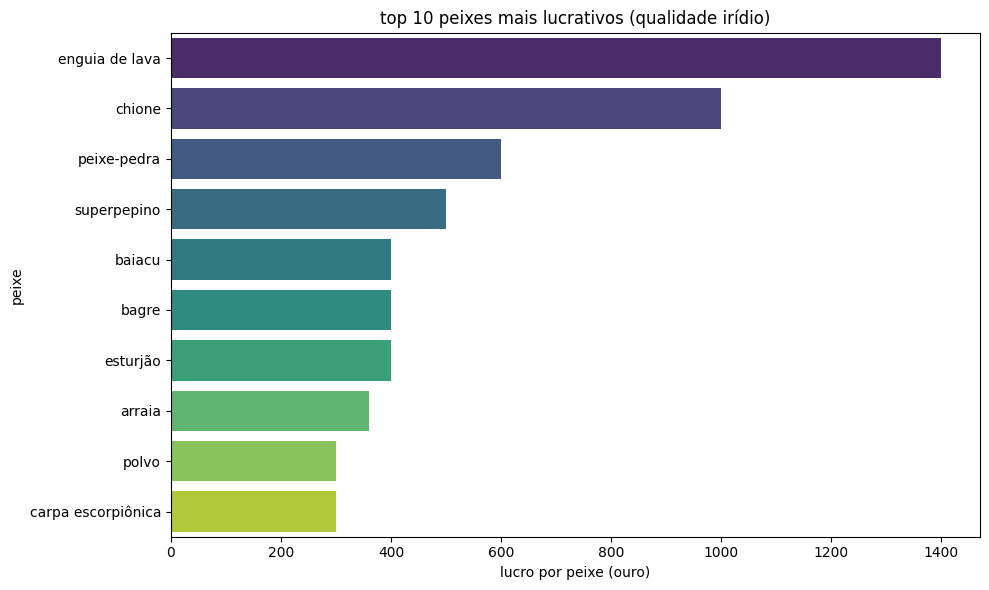

C:\Users\giovanna\AppData\Local\Temp\ipykernel_16208\183223376.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_por_peixe_normal', y='peixe', data=df_top_normal, palette='plasma')


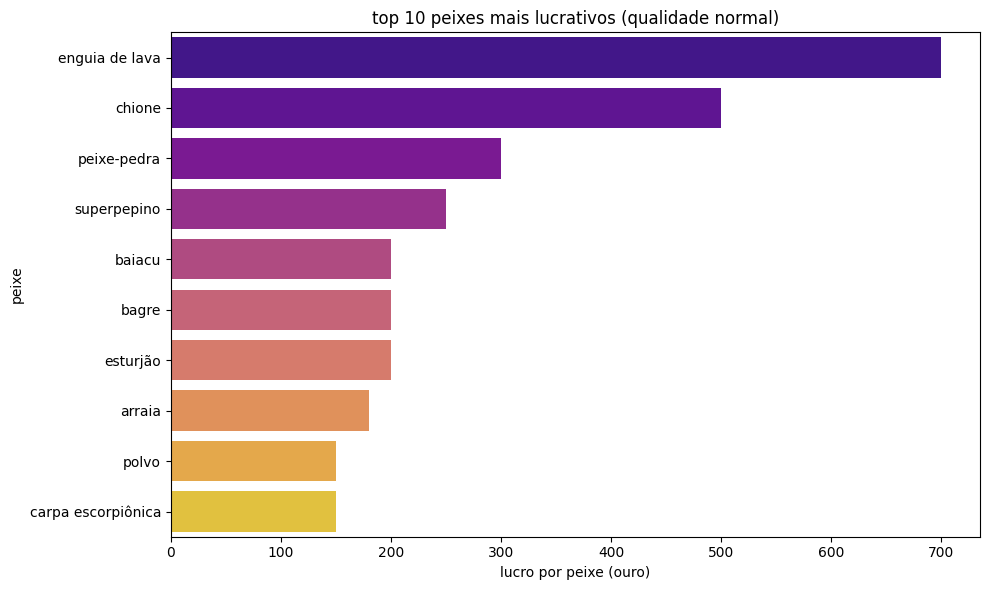

C:\Users\giovanna\AppData\Local\Temp\ipykernel_16208\183223376.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_por_peixe_prata', y='peixe', data=df_top_prata, palette='mako')


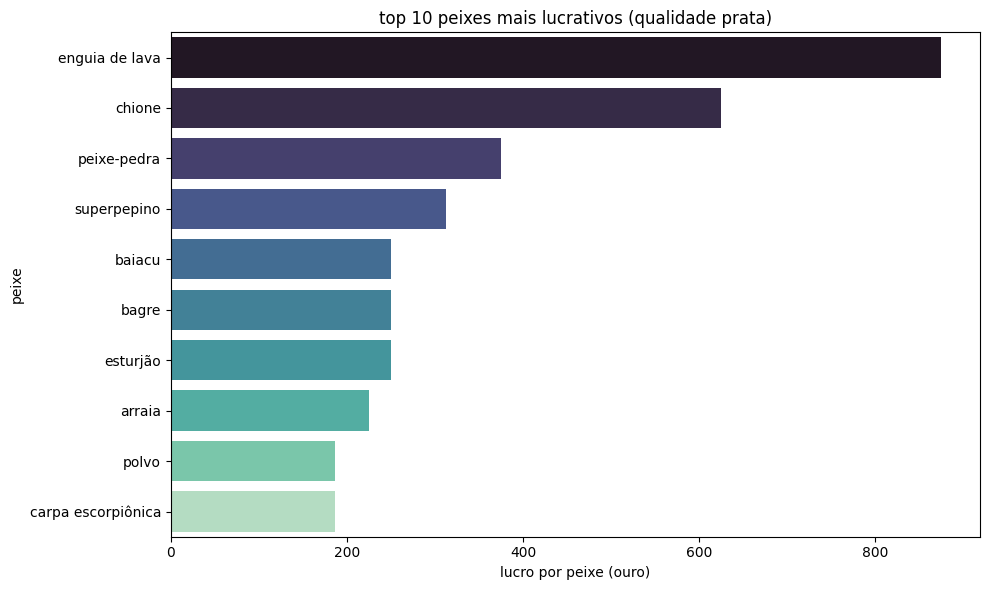

C:\Users\giovanna\AppData\Local\Temp\ipykernel_16208\183223376.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_por_peixe_ouro', y='peixe', data=df_top_ouro, palette='rocket')


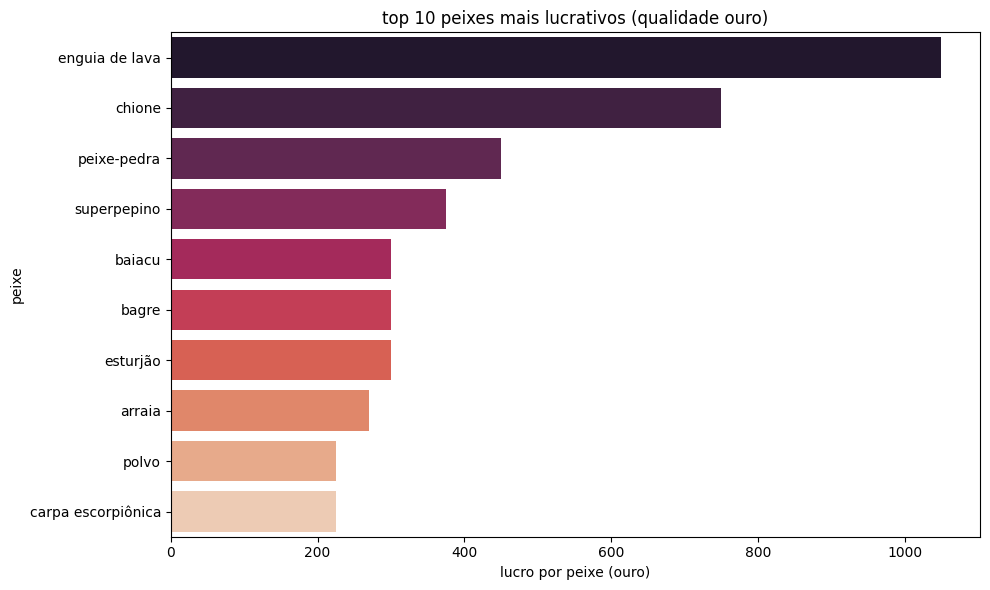

In [14]:
print("\nrealizando análises e gerando visualizações de pesca...")
try:
    conn = sqlite3.connect(caminho_banco_dados)

    # exemplo 1: top 10 peixes mais lucrativos (qualidade irídio)
    query_top_iridio = "SELECT peixe, lucro_por_peixe_iridio FROM stardew_valley_pesca ORDER BY lucro_por_peixe_iridio DESC LIMIT 10;"
    df_top_iridio = pd.read_sql_query(query_top_iridio, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_por_peixe_iridio', y='peixe', data=df_top_iridio, palette='viridis')
    plt.title('top 10 peixes mais lucrativos (qualidade irídio)')
    plt.xlabel('lucro por peixe (ouro)')
    plt.ylabel('peixe')
    plt.tight_layout()
    os.makedirs(caminho_pasta_graficos_pesca, exist_ok=True)
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top_10_peixes_iridio.png'))
    plt.show()

    # exemplo 2: top 10 peixes mais lucrativos (qualidade normal)
    query_top_normal = "SELECT peixe, lucro_por_peixe_normal FROM stardew_valley_pesca ORDER BY lucro_por_peixe_normal DESC LIMIT 10;"
    df_top_normal = pd.read_sql_query(query_top_normal, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_por_peixe_normal', y='peixe', data=df_top_normal, palette='plasma')
    plt.title('top 10 peixes mais lucrativos (qualidade normal)')
    plt.xlabel('lucro por peixe (ouro)')
    plt.ylabel('peixe')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top_10_peixes_normal.png'))
    plt.show()

    # exemplo 3: top 10 peixes mais lucrativos (qualidade prata)
    query_top_prata = "SELECT peixe, lucro_por_peixe_prata FROM stardew_valley_pesca ORDER BY lucro_por_peixe_prata DESC LIMIT 10;"
    df_top_prata = pd.read_sql_query(query_top_prata, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_por_peixe_prata', y='peixe', data=df_top_prata, palette='mako')
    plt.title('top 10 peixes mais lucrativos (qualidade prata)')
    plt.xlabel('lucro por peixe (ouro)')
    plt.ylabel('peixe')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top_10_peixes_prata.png'))
    plt.show()

    # exemplo 4: top 10 peixes mais lucrativos (qualidade ouro)
    query_top_ouro = "SELECT peixe, lucro_por_peixe_ouro FROM stardew_valley_pesca ORDER BY lucro_por_peixe_ouro DESC LIMIT 10;"
    df_top_ouro = pd.read_sql_query(query_top_ouro, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_por_peixe_ouro', y='peixe', data=df_top_ouro, palette='rocket')
    plt.title('top 10 peixes mais lucrativos (qualidade ouro)')
    plt.xlabel('lucro por peixe (ouro)')
    plt.ylabel('peixe')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top_10_peixes_ouro.png'))
    plt.show()

except sqlite3.Error as e:
    print(f"erro ao realizar consulta ou gerar gráfico de pesca: {e}")
finally:
    if conn:
        conn.close()